# 국민청원 데이터 분석하기 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'])

In [3]:
df.shape

(395547, 8)

In [4]:
df.head(5)

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [5]:
df.isnull().sum()

article_id    0
start         0
end           0
answered      0
votes         0
category      0
title         0
content       1
dtype: int64

# 데이터 요약하기

In [6]:
df.info() #전체적인 데이터에 대한 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395547 entries, 0 to 395546
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   article_id  395547 non-null  int64         
 1   start       395547 non-null  datetime64[ns]
 2   end         395547 non-null  datetime64[ns]
 3   answered    395547 non-null  int64         
 4   votes       395547 non-null  int64         
 5   category    395547 non-null  object        
 6   title       395547 non-null  object        
 7   content     395546 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 24.1+ MB


In [7]:
df.dtypes #데이터 타입 정보

article_id             int64
start         datetime64[ns]
end           datetime64[ns]
answered               int64
votes                  int64
category              object
title                 object
content               object
dtype: object

In [8]:
df.columns #열 이름 정보

Index(['article_id', 'start', 'end', 'answered', 'votes', 'category', 'title',
       'content'],
      dtype='object')

In [9]:
df.describe() #수치형 데이터 요약

,article_id,answered,votes
count,395547.000000,395547.000000,3.955470e+05
mean,251608.934635,0.000073,1.501188e+02
std,153219.216242,0.008562,4.802583e+03
min,21.000000,0.000000,0.000000e+00
25%,115236.500000,0.000000,2.000000e+00
50%,253682.000000,0.000000,5.000000e+00
75%,386137.500000,0.000000,1.500000e+01
max,517122.000000,1.000000,1.192049e+06


In [10]:
df.describe(include=np.object) #object 중 가장 많이 나오는 데이터 출력

,category,title,content
count,395547,395547,395546
unique,17,346524,375224
top,정치개혁,이명박 출국금지,이명박 출국금지
freq,62750,3018,597


## 답변대상 청원 보기

In [11]:
df_20 = df.loc[df['votes'] > 200000]
df_20.shape

(80, 8)

In [12]:
df_20.category.value_counts()

인권/성평등         24
안전/환경          10
기타              8
정치개혁            8
문화/예술/체육/언론     7
반려동물            4
외교/통일/국방        4
보건복지            3
육아/교육           3
교통/건축/국토        3
경제민주화           2
성장동력            2
미래              1
행정              1
Name: category, dtype: int64

In [13]:
df_20[['title', 'content']].head(3)

,title,content
1752,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...
10894,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!
18111,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...


In [14]:
df['answer'] = (df['votes'] > 200000) == 1 #20만건 이상 투표를 받은 청원을 칼럼으로 추가

In [15]:
df.shape

(395547, 9)

In [16]:
df.dtypes

article_id             int64
start         datetime64[ns]
end           datetime64[ns]
answered               int64
votes                  int64
category              object
title                 object
content               object
answer                  bool
dtype: object

In [17]:
df['answer'] = df['answer'].astype('int')

In [18]:
df['answer_diff'] = df['answer'] - df['answered']
df['answer_diff'].sum()

51

## 답변 대상 청원 중 투표를 가장 많이 받은 것

In [19]:
answered_df = df.loc[df['answer'] == 1]
answered_df.sort_values('votes', ascending=False).head(5)

,article_id,start,end,answered,votes,category,title,content,answer,answer_diff
313314,408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...,1,1
208597,269548,2018-06-13,2018-07-13,0,714875,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...,1,1
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,1,0
118970,142600,2018-02-19,2018-03-21,1,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달...",1,0
183791,230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...,1,0


## 어느 분야의 청원이 가장 많이 들어왔는지?

In [20]:
category = pd.DataFrame(df['category'].value_counts()).reset_index()
category.columns = ['category','count']
category

,category,count
0,정치개혁,62750
1,기타,48682
2,인권/성평등,34993
3,안전/환경,30638
4,교통/건축/국토,28184
5,외교/통일/국방,26626
6,육아/교육,25537
7,보건복지,24848
8,일자리,23225
9,행정,20268


## 분석해보기

In [21]:

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, timedelta





import warnings
warnings.filterwarnings("ignore")

import os

import datetime

In [22]:
#날짜 관련 변수

df['start date'] = pd.to_datetime(df['start'], format = '%Y-%m-%d')
df['month'] = df['start date'].dt.month
df['yoil'] = df['start date'].dt.dayofweek
#yoil의 0 월~~6 일
df.shape
df.head()

,article_id,start,end,answered,votes,category,title,content,answer,answer_diff,start date,month,yoil
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,0,0,2017-08-19,8,5
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,0,0,2017-08-19,8,5
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",0,0,2017-08-19,8,5
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...,0,0,2017-08-19,8,5
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",0,0,2017-08-19,8,5


In [23]:
#시작 날짜의 요일별 투표 수 
yoil_votes=df.groupby("yoil").votes
yoil_votes.describe()
#요일별 평균 투표수는 일요일에 가장 많으며 토요일에 가장 적다.  

,count,mean,std,min,25%,50%,75%,max
yoil,,,,,,,,
0,54234.0,144.611277,4475.826625,0.0,2.0,6.0,17.0,614127.0
1,65229.0,133.623266,3839.164537,0.0,1.0,5.0,15.0,406655.0
2,61966.0,168.637866,7178.029649,0.0,2.0,5.0,15.0,1192049.0
3,63072.0,144.939070,3921.178763,0.0,1.0,5.0,15.0,330587.0
4,56646.0,169.119320,4624.517187,0.0,2.0,6.0,17.0,419006.0
5,50984.0,121.415954,3747.933754,0.0,1.0,4.0,13.0,360905.0
6,43416.0,171.790884,4763.630598,0.0,2.0,6.0,17.0,413924.0


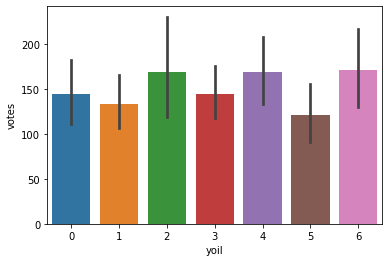

In [24]:
plt.subplots()
sns.barplot(x = 'yoil', y= 'votes', data = df)
plt.show()
#편차는 수요일에 가장 큰 것으로 보인다.

In [25]:
# 기간별 투표수 보기
df["period"]=df["end"]-df["start"]
period_votes=df.groupby("period").votes
period_votes.describe()

#기간이 길다고 투표수가 많아지는 것은 아니다. 

,count,mean,std,min,25%,50%,75%,max
period,,,,,,,,
7 days,2436.0,47.352627,950.751596,0.0,0.0,0.0,1.0,34318.0
15 days,1204.0,143.583887,3568.392302,0.0,0.0,0.0,2.0,123204.0
30 days,384347.0,150.238956,4735.130090,0.0,2.0,5.0,16.0,1192049.0
60 days,806.0,561.816377,11334.174517,0.0,0.0,0.0,2.0,296330.0
90 days,6754.0,132.381700,7545.669256,0.0,0.0,0.0,1.0,615354.0


In [35]:
period_votes.head()
df.head()

,article_id,start,end,answered,votes,category,title,content,answer,answer_diff,start date,month,yoil,period
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,0,0,2017-08-19,8,5,90 days
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,0,0,2017-08-19,8,5,90 days
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",0,0,2017-08-19,8,5,15 days
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...,0,0,2017-08-19,8,5,7 days
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",0,0,2017-08-19,8,5,15 days


In [ ]:
#20만을  넘었지만 답변을 받지 못한 청원

인권/성평등         15
안전/환경           8
기타              7
정치개혁            6
반려동물            4
외교/통일/국방        3
문화/예술/체육/언론     3
육아/교육           2
경제민주화           1
보건복지            1
교통/건축/국토        1
Name: category, dtype: int64

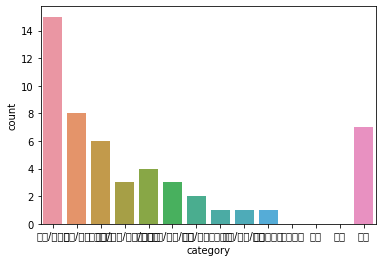

In [49]:
unanswered=df.loc[(df["answer_diff"]==1)]
unanswered.head()

sns.countplot("category",data=unanswered,order=['인권/성평등','안전/환경','정치개혁','문화/예술/체육/언론','반려동물','외교/통일/국방','육아/교육','보건복지','교통/건축/국토','경제민주화','성장동력','행정','미래','기타'])
unanswered["category"].value_counts()

인권/성평등         24
안전/환경          10
기타              8
정치개혁            8
문화/예술/체육/언론     7
반려동물            4
외교/통일/국방        4
보건복지            3
육아/교육           3
교통/건축/국토        3
경제민주화           2
성장동력            2
미래              1
행정              1
Name: category, dtype: int64

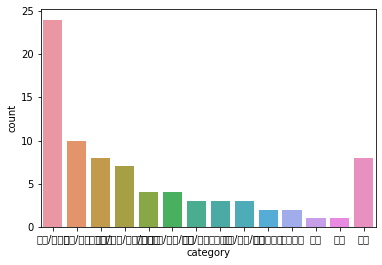

In [53]:
#투표수가 20만명이 넘은 청원들
answer=df.loc[(df["answer"]==1)]
sns.countplot("category",data=answer,order=['인권/성평등','안전/환경','정치개혁','문화/예술/체육/언론','반려동물','외교/통일/국방','육아/교육','보건복지','교통/건축/국토','경제민주화','성장동력','행정','미래','기타'])
answer["category"].value_counts()

In [54]:
#카테고리별 답변이 된 비율
answer[answer["answered"]==0].groupby("category").size()

category
경제민주화           1
교통/건축/국토        1
기타              7
문화/예술/체육/언론     3
반려동물            4
보건복지            1
안전/환경           8
외교/통일/국방        3
육아/교육           2
인권/성평등         15
정치개혁            6
dtype: int64

In [57]:
#청원 대상 중 답변 된 비율
answer.groupby("category").answered.mean().sort_values(ascending=False)

category
행정             1.000000
성장동력           1.000000
미래             1.000000
보건복지           0.666667
교통/건축/국토       0.666667
문화/예술/체육/언론    0.571429
경제민주화          0.500000
인권/성평등         0.375000
육아/교육          0.333333
정치개혁           0.250000
외교/통일/국방       0.250000
안전/환경          0.200000
기타             0.125000
반려동물           0.000000
Name: answered, dtype: float64